<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#https://www.tensorflow.org/tutorials/keras/regression" data-toc-modified-id="https://www.tensorflow.org/tutorials/keras/regression-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><a href="https://www.tensorflow.org/tutorials/keras/regression" rel="nofollow" target="_blank">https://www.tensorflow.org/tutorials/keras/regression</a></a></span></li><li><span><a href="#" data-toc-modified-id="-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>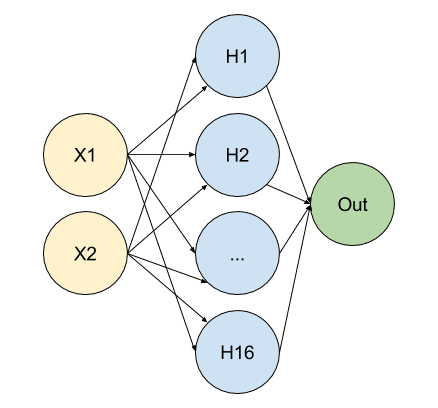</a></span></li><li><span><a href="#AND" data-toc-modified-id="AND-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>AND</a></span></li><li><span><a href="#OR" data-toc-modified-id="OR-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>OR</a></span></li><li><span><a href="#XOR-NEED-MINIMUM-4-HIDDEN-LAYERS" data-toc-modified-id="XOR-NEED-MINIMUM-4-HIDDEN-LAYERS-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>XOR NEED MINIMUM 4 HIDDEN LAYERS</a></span></li><li><span><a href="#MANUAL-OR-GATE" data-toc-modified-id="MANUAL-OR-GATE-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>MANUAL OR GATE</a></span></li><li><span><a href="#MANUAL-AND-GATE" data-toc-modified-id="MANUAL-AND-GATE-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>MANUAL AND GATE</a></span></li></ul></div>

# https://www.tensorflow.org/tutorials/keras/regression

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [4]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.7.0


In [5]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

In [39]:
dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [40]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [41]:
dataset = dataset.dropna()

In [42]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [43]:
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [44]:
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

In [45]:
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA
2,18.0,8,318.0,150.0,3436.0,11.0,70,USA
3,16.0,8,304.0,150.0,3433.0,12.0,70,USA
4,17.0,8,302.0,140.0,3449.0,10.5,70,USA


In [46]:
dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,0,1


In [47]:
train_dataset = dataset.sample(frac=0.8, random_state=0)


In [48]:
len(train_dataset.index)

314

In [49]:
test_dataset = dataset.drop(train_dataset.index)

In [50]:
len(test_dataset.index)

78

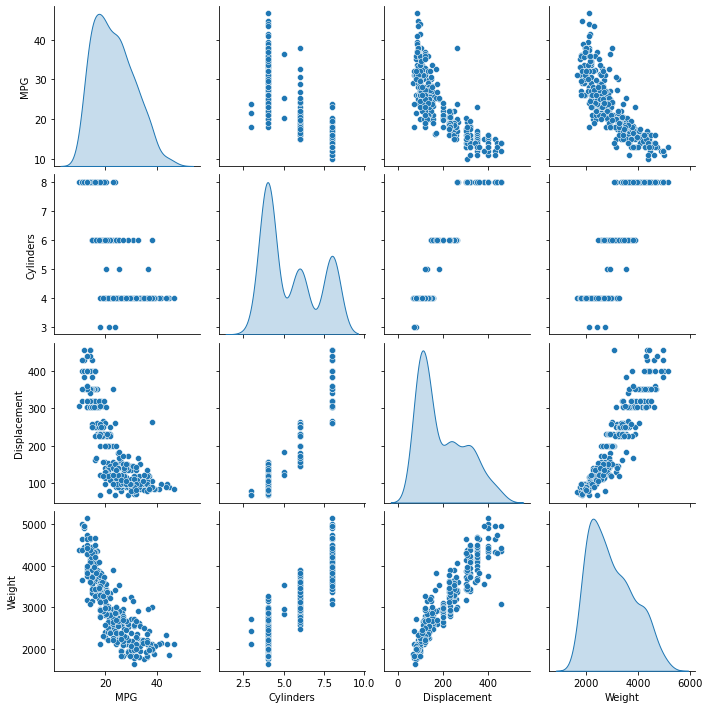

In [51]:
sns.pairplot(train_dataset[['MPG', 'Cylinders', 'Displacement', 'Weight']], diag_kind='kde')

In [52]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MPG,314.0,23.310510,7.728652,10.0,17.00,22.0,28.95,46.6
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0


In [53]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')

In [54]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
MPG,23.310510,7.728652
Cylinders,5.477707,1.699788
Displacement,195.318471,104.331589
Horsepower,104.869427,38.096214
Weight,2990.251592,843.898596
Acceleration,15.559236,2.789230
Model Year,75.898089,3.675642
Europe,0.178344,0.383413
Japan,0.197452,0.398712
USA,0.624204,0.485101


In [55]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [56]:
normalizer.adapt(np.array(train_features))

In [57]:
print(normalizer.mean.numpy())

[[   5.478  195.318  104.869 2990.252   15.559   75.898    0.178    0.197
     0.624]]


In [58]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[   4.    90.    75.  2125.    14.5   74.     0.     0.     1. ]]

Normalized: [[-0.87 -1.01 -0.79 -1.03 -0.38 -0.52 -0.47 -0.5   0.78]]


In [59]:
horsepower = np.array(train_features['Horsepower'])

horsepower_normalizer = layers.Normalization(input_shape=[1,], axis=None)
horsepower_normalizer.adapt(horsepower)

In [60]:
horsepower_model = tf.keras.Sequential([
    horsepower_normalizer,
    layers.Dense(units=1)
])

horsepower_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_2 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [61]:
horsepower_model.predict(horsepower[:10])

array([[ 0.972],
       [ 0.549],
       [-1.794],
       [ 1.362],
       [ 1.232],
       [ 0.484],
       [ 1.46 ],
       [ 1.232],
       [ 0.321],
       [ 0.549]], dtype=float32)

In [62]:
horsepower_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [63]:
%%time
history = horsepower_model.fit(
    train_features['Horsepower'],
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

CPU times: user 4.56 s, sys: 376 ms, total: 4.94 s
Wall time: 4.76 s


In [64]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,3.806573,4.192883,95
96,3.806909,4.158134,96
97,3.804212,4.172850,97
98,3.803935,4.192451,98
99,3.803389,4.203382,99


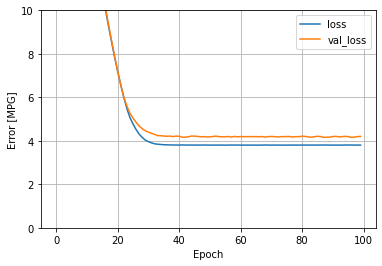

In [65]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)
plot_loss(history)

In [66]:
test_results = {}

test_results['horsepower_model'] = horsepower_model.evaluate(
    test_features['Horsepower'],
    test_labels, verbose=0)

In [67]:
x = tf.linspace(0.0, 250, 251)
y = horsepower_model.predict(x)

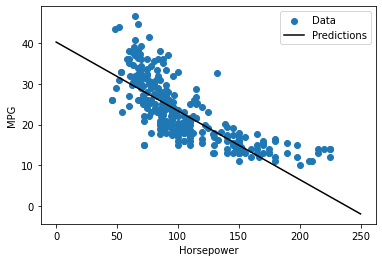

In [68]:
def plot_horsepower(x, y):
  plt.scatter(train_features['Horsepower'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('Horsepower')
  plt.ylabel('MPG')
  plt.legend()
plot_horsepower(x,y)

In [71]:
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense

# the four different states of the XOR gate
training_data = np.array([[0,0],[0,1],[1,0],[1,1]], "float32")

# the four expected results in the same order
target_data = np.array([[0],[1],[1],[0]], "float32")



In [72]:
model = Sequential()


In [73]:
model.add(Dense(16, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['binary_accuracy'])



In [76]:
model.fit(training_data, target_data, epochs=500, verbose=2)

#

Epoch 1/500
1/1 - 1s - loss: 0.2505 - binary_accuracy: 0.7500 - 815ms/epoch - 815ms/step
Epoch 2/500
1/1 - 0s - loss: 0.2501 - binary_accuracy: 0.5000 - 7ms/epoch - 7ms/step
Epoch 3/500
1/1 - 0s - loss: 0.2498 - binary_accuracy: 0.7500 - 3ms/epoch - 3ms/step
Epoch 4/500
1/1 - 0s - loss: 0.2494 - binary_accuracy: 0.7500 - 25ms/epoch - 25ms/step
Epoch 5/500
1/1 - 0s - loss: 0.2491 - binary_accuracy: 0.7500 - 6ms/epoch - 6ms/step
Epoch 6/500
1/1 - 0s - loss: 0.2487 - binary_accuracy: 0.7500 - 4ms/epoch - 4ms/step
Epoch 7/500
1/1 - 0s - loss: 0.2484 - binary_accuracy: 0.7500 - 7ms/epoch - 7ms/step
Epoch 8/500
1/1 - 0s - loss: 0.2480 - binary_accuracy: 0.7500 - 19ms/epoch - 19ms/step
Epoch 9/500
1/1 - 0s - loss: 0.2477 - binary_accuracy: 0.7500 - 20ms/epoch - 20ms/step
Epoch 10/500
1/1 - 0s - loss: 0.2474 - binary_accuracy: 0.7500 - 13ms/epoch - 13ms/step
Epoch 11/500
1/1 - 0s - loss: 0.2470 - binary_accuracy: 0.7500 - 8ms/epoch - 8ms/step
Epoch 12/500
1/1 - 0s - loss: 0.2467 - binary_accur

Epoch 96/500
1/1 - 0s - loss: 0.2254 - binary_accuracy: 1.0000 - 7ms/epoch - 7ms/step
Epoch 97/500
1/1 - 0s - loss: 0.2252 - binary_accuracy: 1.0000 - 7ms/epoch - 7ms/step
Epoch 98/500
1/1 - 0s - loss: 0.2249 - binary_accuracy: 1.0000 - 14ms/epoch - 14ms/step
Epoch 99/500
1/1 - 0s - loss: 0.2247 - binary_accuracy: 1.0000 - 4ms/epoch - 4ms/step
Epoch 100/500
1/1 - 0s - loss: 0.2245 - binary_accuracy: 1.0000 - 2ms/epoch - 2ms/step
Epoch 101/500
1/1 - 0s - loss: 0.2242 - binary_accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 102/500
1/1 - 0s - loss: 0.2240 - binary_accuracy: 1.0000 - 4ms/epoch - 4ms/step
Epoch 103/500
1/1 - 0s - loss: 0.2238 - binary_accuracy: 1.0000 - 4ms/epoch - 4ms/step
Epoch 104/500
1/1 - 0s - loss: 0.2236 - binary_accuracy: 1.0000 - 3ms/epoch - 3ms/step
Epoch 105/500
1/1 - 0s - loss: 0.2233 - binary_accuracy: 1.0000 - 3ms/epoch - 3ms/step
Epoch 106/500
1/1 - 0s - loss: 0.2231 - binary_accuracy: 1.0000 - 7ms/epoch - 7ms/step
Epoch 107/500
1/1 - 0s - loss: 0.2229 - bin

Epoch 190/500
1/1 - 0s - loss: 0.2020 - binary_accuracy: 1.0000 - 3ms/epoch - 3ms/step
Epoch 191/500
1/1 - 0s - loss: 0.2018 - binary_accuracy: 1.0000 - 3ms/epoch - 3ms/step
Epoch 192/500
1/1 - 0s - loss: 0.2015 - binary_accuracy: 1.0000 - 6ms/epoch - 6ms/step
Epoch 193/500
1/1 - 0s - loss: 0.2012 - binary_accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 194/500
1/1 - 0s - loss: 0.2009 - binary_accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 195/500
1/1 - 0s - loss: 0.2007 - binary_accuracy: 1.0000 - 3ms/epoch - 3ms/step
Epoch 196/500
1/1 - 0s - loss: 0.2004 - binary_accuracy: 1.0000 - 5ms/epoch - 5ms/step
Epoch 197/500
1/1 - 0s - loss: 0.2001 - binary_accuracy: 1.0000 - 3ms/epoch - 3ms/step
Epoch 198/500
1/1 - 0s - loss: 0.1998 - binary_accuracy: 1.0000 - 5ms/epoch - 5ms/step
Epoch 199/500
1/1 - 0s - loss: 0.1995 - binary_accuracy: 1.0000 - 4ms/epoch - 4ms/step
Epoch 200/500
1/1 - 0s - loss: 0.1992 - binary_accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 201/500
1/1 - 0s - loss: 0.1989 -

Epoch 284/500
1/1 - 0s - loss: 0.1737 - binary_accuracy: 1.0000 - 3ms/epoch - 3ms/step
Epoch 285/500
1/1 - 0s - loss: 0.1734 - binary_accuracy: 1.0000 - 3ms/epoch - 3ms/step
Epoch 286/500
1/1 - 0s - loss: 0.1731 - binary_accuracy: 1.0000 - 3ms/epoch - 3ms/step
Epoch 287/500
1/1 - 0s - loss: 0.1727 - binary_accuracy: 1.0000 - 5ms/epoch - 5ms/step
Epoch 288/500
1/1 - 0s - loss: 0.1724 - binary_accuracy: 1.0000 - 5ms/epoch - 5ms/step
Epoch 289/500
1/1 - 0s - loss: 0.1721 - binary_accuracy: 1.0000 - 5ms/epoch - 5ms/step
Epoch 290/500
1/1 - 0s - loss: 0.1718 - binary_accuracy: 1.0000 - 5ms/epoch - 5ms/step
Epoch 291/500
1/1 - 0s - loss: 0.1715 - binary_accuracy: 1.0000 - 4ms/epoch - 4ms/step
Epoch 292/500
1/1 - 0s - loss: 0.1712 - binary_accuracy: 1.0000 - 5ms/epoch - 5ms/step
Epoch 293/500
1/1 - 0s - loss: 0.1708 - binary_accuracy: 1.0000 - 7ms/epoch - 7ms/step
Epoch 294/500
1/1 - 0s - loss: 0.1705 - binary_accuracy: 1.0000 - 5ms/epoch - 5ms/step
Epoch 295/500
1/1 - 0s - loss: 0.1702 - bin

Epoch 378/500
1/1 - 0s - loss: 0.1441 - binary_accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 379/500
1/1 - 0s - loss: 0.1438 - binary_accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 380/500
1/1 - 0s - loss: 0.1435 - binary_accuracy: 1.0000 - 14ms/epoch - 14ms/step
Epoch 381/500
1/1 - 0s - loss: 0.1432 - binary_accuracy: 1.0000 - 5ms/epoch - 5ms/step
Epoch 382/500
1/1 - 0s - loss: 0.1429 - binary_accuracy: 1.0000 - 5ms/epoch - 5ms/step
Epoch 383/500
1/1 - 0s - loss: 0.1425 - binary_accuracy: 1.0000 - 5ms/epoch - 5ms/step
Epoch 384/500
1/1 - 0s - loss: 0.1422 - binary_accuracy: 1.0000 - 7ms/epoch - 7ms/step
Epoch 385/500
1/1 - 0s - loss: 0.1420 - binary_accuracy: 1.0000 - 4ms/epoch - 4ms/step
Epoch 386/500
1/1 - 0s - loss: 0.1416 - binary_accuracy: 1.0000 - 17ms/epoch - 17ms/step
Epoch 387/500
1/1 - 0s - loss: 0.1413 - binary_accuracy: 1.0000 - 3ms/epoch - 3ms/step
Epoch 388/500
1/1 - 0s - loss: 0.1410 - binary_accuracy: 1.0000 - 17ms/epoch - 17ms/step
Epoch 389/500
1/1 - 0s - loss: 0.14

Epoch 472/500
1/1 - 0s - loss: 0.1157 - binary_accuracy: 1.0000 - 7ms/epoch - 7ms/step
Epoch 473/500
1/1 - 0s - loss: 0.1153 - binary_accuracy: 1.0000 - 6ms/epoch - 6ms/step
Epoch 474/500
1/1 - 0s - loss: 0.1150 - binary_accuracy: 1.0000 - 5ms/epoch - 5ms/step
Epoch 475/500
1/1 - 0s - loss: 0.1147 - binary_accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 476/500
1/1 - 0s - loss: 0.1143 - binary_accuracy: 1.0000 - 14ms/epoch - 14ms/step
Epoch 477/500
1/1 - 0s - loss: 0.1140 - binary_accuracy: 1.0000 - 3ms/epoch - 3ms/step
Epoch 478/500
1/1 - 0s - loss: 0.1136 - binary_accuracy: 1.0000 - 4ms/epoch - 4ms/step
Epoch 479/500
1/1 - 0s - loss: 0.1133 - binary_accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 480/500
1/1 - 0s - loss: 0.1130 - binary_accuracy: 1.0000 - 8ms/epoch - 8ms/step
Epoch 481/500
1/1 - 0s - loss: 0.1126 - binary_accuracy: 1.0000 - 8ms/epoch - 8ms/step
Epoch 482/500
1/1 - 0s - loss: 0.1123 - binary_accuracy: 1.0000 - 14ms/epoch - 14ms/step
Epoch 483/500
1/1 - 0s - loss: 0.11

In [77]:
print(model.predict(training_data).round())

[[0.]
 [1.]
 [1.]
 [0.]]


# 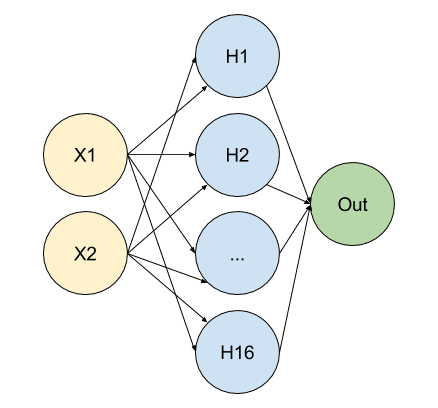

In [78]:
# https://blog.thoughtram.io/machine-learning/2016/11/02/understanding-XOR-with-keras-and-tensorlow.html

In [91]:
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense

import warnings
warnings.simplefilter("ignore")

# the four different states of the XOR gate
training_data = np.array([[0,0],[0,1],[1,0],[1,1]], "float32")

# the four expected results in the same order
target_data = np.array([[0],[1],[1],[0]], "float32")

model = Sequential()
model.add(Dense(16, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['binary_accuracy'])
              
model.fit(x=training_data, y=target_data, epochs=500, verbose=0)
print(model.predict(training_data).round())

[[0.]
 [1.]
 [1.]
 [0.]]


In [83]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 16)                48        
                                                                 
 dense_8 (Dense)             (None, 1)                 17        
                                                                 
Total params: 65
Trainable params: 65
Non-trainable params: 0
_________________________________________________________________


In [85]:
model.weights

[<tf.Variable 'dense_7/kernel:0' shape=(2, 16) dtype=float32, numpy=
 array([[-0.71 , -0.073, -0.329, -0.537,  0.402, -0.495, -0.543,  0.705,
         -0.404,  0.409,  0.076,  0.358, -0.403, -0.333, -0.436, -0.509],
        [ 0.709, -0.317, -0.23 , -0.367,  0.399,  0.229,  0.238, -0.705,
         -0.369,  0.409, -0.247,  0.781, -0.122, -0.541, -0.252, -0.118]],
       dtype=float32)>,
 <tf.Variable 'dense_7/bias:0' shape=(16,) dtype=float32, numpy=
 array([ 0.   ,  0.   ,  0.   ,  0.   , -0.399, -0.243, -0.251, -0.   ,
         0.   , -0.409, -0.095,  0.001,  0.   ,  0.   ,  0.   ,  0.   ],
       dtype=float32)>,
 <tf.Variable 'dense_8/kernel:0' shape=(16, 1) dtype=float32, numpy=
 array([[ 0.701],
        [-0.357],
        [ 0.383],
        [-0.294],
        [-1.021],
        [-0.331],
        [-0.248],
        [ 1.088],
        [-0.51 ],
        [-1.129],
        [-0.338],
        [ 0.522],
        [-0.502],
        [-0.214],
        [-0.085],
        [ 0.476]], dtype=float32)>,
 <t

In [87]:
model.loss

'mean_squared_error'

In [88]:
model.optimizer

# AND

In [101]:
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense

import warnings
warnings.simplefilter("ignore")

# the four different states of the AND gate
training_data = np.array([[0,0],[0,1],[1,0],[1,1]], "float32")

# the four expected results in the same order
target_data = np.array([[0],[0],[0],[1]], "float32")

model = Sequential()
model.add(Dense(16, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['binary_accuracy'])
              
model.fit(x=training_data, y=target_data, epochs=500, verbose=0)
# print(model.predict(training_data).round())
print(model.predict(np.array([[0,1]], "float32")).round())

[[0.]]


# OR

In [102]:
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense

import warnings
warnings.simplefilter("ignore")

# the four different states of the AND gate
training_data = np.array([[0,0],[0,1],[1,0],[1,1]], "float32")

# the four expected results in the same order
target_data = np.array([[0],[1],[1],[1]], "float32")

model = Sequential()
model.add(Dense(16, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['binary_accuracy'])
              
model.fit(x=training_data, y=target_data, epochs=500, verbose=0)
# print(model.predict(training_data).round())
print(model.predict(np.array([[0,1]], "float32")).round())

[[1.]]


# XOR NEED MINIMUM 4 HIDDEN LAYERS

In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense

import warnings
warnings.simplefilter("ignore")

# the four different states of the AND gate
training_data = np.array([[0,0],[0,1],[1,0],[1,1]], "float32")

# the four expected results in the same order
target_data = np.array([[0],[1],[1],[0]], "float32")

model = Sequential()
model.add(Dense(4, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['binary_accuracy'])
              
model.fit(x=training_data, y=target_data, epochs=500, verbose=0)
print(model.predict(training_data).round())
# print(model.predict(np.array([[0,1]], "float32")).round())

2021-11-26 21:33:59.758360: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


[[0.]
 [1.]
 [0.]
 [0.]]


In [116]:
model.weights

[<tf.Variable 'dense_55/kernel:0' shape=(2, 4) dtype=float32, numpy=
 array([[ 0.696,  0.879,  0.706,  1.023],
        [-0.696, -0.638,  0.545, -0.274]], dtype=float32)>,
 <tf.Variable 'dense_55/bias:0' shape=(4,) dtype=float32, numpy=array([-0.   , -0.014, -0.545,  0.274], dtype=float32)>,
 <tf.Variable 'dense_56/kernel:0' shape=(4, 1) dtype=float32, numpy=
 array([[ 1.575],
        [ 1.101],
        [-0.666],
        [-0.839]], dtype=float32)>,
 <tf.Variable 'dense_56/bias:0' shape=(1,) dtype=float32, numpy=array([0.112], dtype=float32)>]

In [2]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 12        
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


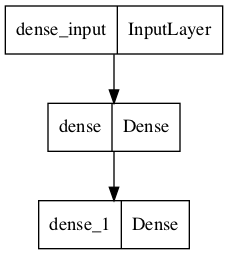

In [3]:
# pip install pydot

import tensorflow as tf
import keras.utils.vis_utils
# from importlib import reload
# reload(keras.utils.vis_utils)
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png')
# tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True)


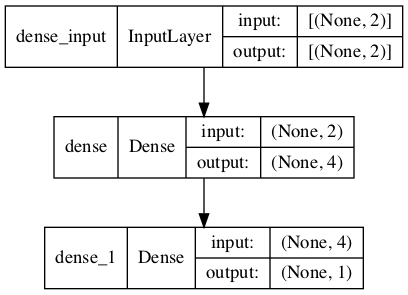

In [6]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True)


In [4]:
! ls -l

total 872
-rw-r--r--   1 sree  staff   70440 Nov 25 22:00 00-SREE-TEST.ipynb
-rw-r--r--   1 sree  staff   13450 Nov 25 22:53 00-TF-FASHION.ipynb
-rw-r--r--   1 sree  staff  336529 Nov 26 21:17 000-TF-REGRESSION.ipynb
drwxr-xr-x  10 sree  staff     340 Nov 13 18:40 AI
drwxr-xr-x   7 sree  staff     238 Nov  7 17:59 Decision-Tree-Salries
drwxr-xr-x   3 sree  staff     102 Nov  7 23:36 HEATMAP
drwxr-xr-x   8 sree  staff     272 Nov  9 17:45 KNN-Classifier-Iris
drwxr-xr-x   7 sree  staff     238 Nov  7 17:53 Linear-Regression-Area-Bed-Age-Price
drwxr-xr-x   8 sree  staff     272 Nov 13 00:50 Linear-Regression-Area-Price
drwxr-xr-x   7 sree  staff     238 Nov  7 17:59 Logistic-Regression-Insurance
drwxr-xr-x   7 sree  staff     238 Nov  7 17:59 Logistic-Regression-Iris
drwxrwxr-x@ 27 sree  staff     918 Aug 31  2018 Refactored_Py_DS_ML_Bootcamp-master
drwxr-xr-x   9 sree  staff     306 Nov 21 23:38 TF-CERT
drwxr-xr-x  10 sree  staff     340 Nov  7 16:24 data
-rw-r--r--   1 sree  staff     8

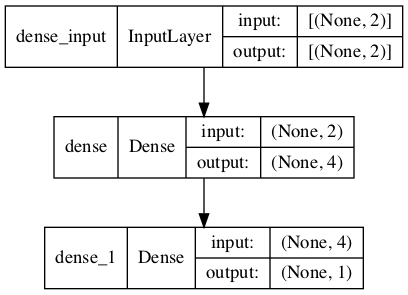

In [1]:
# ! dot -Tpng music_rec.dot -o tree.png

from IPython.display import Image
Image(filename='model.png') 


In [2]:
# importing pandas as pd
import pandas as pd


# importing re for regular expressions
import re


# Creating the Series
sr = pd.Series(['New_York', 'Lisbon', 'Tokyo', 'Paris', 'Munich'])


# Creating the index
idx = ['City 1', 'City 2', 'City 3', 'City 4', 'City 5']


# set the index
sr.index = idx


# Print the series
print(sr)

City 1    New_York
City 2      Lisbon
City 3       Tokyo
City 4       Paris
City 5      Munich
dtype: object


In [3]:
sr.describe()

count            5
unique           5
top       New_York
freq             1
dtype: object

In [6]:
type(sr)

pandas.core.series.Series

In [7]:
# Python program to implement a
# single neuron neural network

# import all necessary libraries
from numpy import exp, array, random, dot, tanh

# Class to create a neural
# network with single neuron
class NeuralNetwork():
	
	def __init__(self):
		
		# Using seed to make sure it'll
		# generate same weights in every run
		random.seed(1)
		
		# 3x1 Weight matrix
		self.weight_matrix = 2 * random.random((3, 1)) - 1

	# tanh as activation function
	def tanh(self, x):
		return tanh(x)

	# derivative of tanh function.
	# Needed to calculate the gradients.
	def tanh_derivative(self, x):
		return 1.0 - tanh(x) ** 2

	# forward propagation
	def forward_propagation(self, inputs):
		return self.tanh(dot(inputs, self.weight_matrix))
	
	# training the neural network.
	def train(self, train_inputs, train_outputs,
							num_train_iterations):
								
		# Number of iterations we want to
		# perform for this set of input.
		for iteration in range(num_train_iterations):
			output = self.forward_propagation(train_inputs)

			# Calculate the error in the output.
			error = train_outputs - output

			# multiply the error by input and then
			# by gradient of tanh function to calculate
			# the adjustment needs to be made in weights
			adjustment = dot(train_inputs.T, error *
							self.tanh_derivative(output))
							
			# Adjust the weight matrix
			self.weight_matrix += adjustment

# Driver Code
if __name__ == "__main__":
	
	neural_network = NeuralNetwork()
	
	print ('Random weights at the start of training')
	print (neural_network.weight_matrix)

	train_inputs = array([[0, 0, 1], [1, 1, 1], [1, 0, 1], [0, 1, 1]])
	train_outputs = array([[0, 1, 1, 0]]).T

	neural_network.train(train_inputs, train_outputs, 10000)

	print ('New weights after training')
	print (neural_network.weight_matrix)

	# Test the neural network with a new situation.
	print ("Testing network on new examples ->")
	print (neural_network.forward_propagation(array([1, 0, 0])))


Random weights at the start of training
[[-0.16595599]
 [ 0.44064899]
 [-0.99977125]]
New weights after training
[[5.39428067]
 [0.19482422]
 [0.34317086]]
Testing network on new examples ->
[0.99995873]


# MANUAL OR GATE

In [26]:
# Python program to implement a
# single neuron neural network

# import all necessary libraries
from numpy import exp, array, random, dot, tanh

# Class to create a neural
# network with single neuron
class NeuralNetwork():
	
	def __init__(self):
		
		# Using seed to make sure it'll
		# generate same weights in every run
		random.seed(1)
		
		# 3x1 Weight matrix
		self.weight_matrix = 2 * random.random((2, 1)) - 1

	# tanh as activation function
	def tanh(self, x):
		return tanh(x)

	# derivative of tanh function.
	# Needed to calculate the gradients.
	def tanh_derivative(self, x):
		return 1.0 - tanh(x) ** 2

	# forward propagation
	def forward_propagation(self, inputs):
		return self.tanh(dot(inputs, self.weight_matrix))
	
	# training the neural network.
	def train(self, train_inputs, train_outputs,
							num_train_iterations):
								
		# Number of iterations we want to
		# perform for this set of input.
		for iteration in range(num_train_iterations):
			output = self.forward_propagation(train_inputs)

			# Calculate the error in the output.
			error = train_outputs - output

			# multiply the error by input and then
			# by gradient of tanh function to calculate
			# the adjustment needs to be made in weights
			adjustment = dot(train_inputs.T, error *
							self.tanh_derivative(output))
							
			# Adjust the weight matrix
			self.weight_matrix += adjustment

# Driver Code
if __name__ == "__main__":
	
	neural_network = NeuralNetwork()
	
	print ('Random weights at the start of training')
	print (neural_network.weight_matrix)

	train_inputs = array([[0, 0], [0, 1], [1, 0], [1, 1]])
	train_outputs = array([[0, 1, 1, 1]]).T

	neural_network.train(train_inputs, train_outputs, 10000)

	print ('New weights after training')
	print (neural_network.weight_matrix)

	# Test the neural network with a new situation.
	print ("Testing network on new examples ->")
	print (neural_network.forward_propagation(array([1, 0])))
	print (neural_network.forward_propagation(array([1, 0])).round())
	print (neural_network.forward_propagation(array([1, 1])).round())
	print (neural_network.forward_propagation(array([0, 0])).round())
    


Random weights at the start of training
[[-0.16595599]
 [ 0.44064899]]
New weights after training
[[4.86602761]
 [4.86598247]]
Testing network on new examples ->
[0.99988131]
[1.]
[1.]
[0.]


# MANUAL AND GATE

In [25]:
# Python program to implement a
# single neuron neural network

# import all necessary libraries
from numpy import exp, array, random, dot, tanh

# Class to create a neural
# network with single neuron
class NeuralNetwork():
	
	def __init__(self):
		
		# Using seed to make sure it'll
		# generate same weights in every run
		random.seed(1)
		
		# 3x1 Weight matrix
		self.weight_matrix = 2 * random.random((2, 1)) - 1

	# tanh as activation function
	def tanh(self, x):
		return tanh(x)

	# derivative of tanh function.
	# Needed to calculate the gradients.
	def tanh_derivative(self, x):
		return 1.0 - tanh(x) ** 2

	# forward propagation
	def forward_propagation(self, inputs):
		return self.tanh(dot(inputs, self.weight_matrix))
	
	# training the neural network.
	def train(self, train_inputs, train_outputs,
							num_train_iterations):
								
		# Number of iterations we want to
		# perform for this set of input.
		for iteration in range(num_train_iterations):
			output = self.forward_propagation(train_inputs)

			# Calculate the error in the output.
			error = train_outputs - output

			# multiply the error by input and then
			# by gradient of tanh function to calculate
			# the adjustment needs to be made in weights
			adjustment = dot(train_inputs.T, error *
							self.tanh_derivative(output))
							
			# Adjust the weight matrix
			self.weight_matrix += adjustment

# Driver Code
if __name__ == "__main__":
	
	neural_network = NeuralNetwork()
	
	print ('Random weights at the start of training')
	print (neural_network.weight_matrix)

	train_inputs = array([[0, 0], [0, 1], [1, 0], [1, 1]])
	train_outputs = array([[0, 0, 0, 1]]).T

	neural_network.train(train_inputs, train_outputs, 10000)

	print ('New weights after training')
	print (neural_network.weight_matrix)

	# Test the neural network with a new situation.
	print ("Testing network on new examples ->")
	print (neural_network.forward_propagation(array([1, 0])))
	print (neural_network.forward_propagation(array([1, 0])).round())
	print (neural_network.forward_propagation(array([1, 1])).round())
	print (neural_network.forward_propagation(array([0, 0])).round())



Random weights at the start of training
[[-0.16595599]
 [ 0.44064899]]
New weights after training
[[0.33928515]
 [0.33928515]]
Testing network on new examples ->
[0.32683906]
[0.]
[1.]
[0.]
